In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Import the data csv file
data = pd.read_csv('data.csv')

In [4]:
# Check data imported correctly
data.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
# Check the "AOV" using mean
data['order_amount'].mean()

3145.128

In [6]:
# Let's check what the top orders are
sort = data.sort_values(by='order_amount', ascending=False)

In [7]:
# Seems like there is a lot of large orders
sort.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


In [8]:
# It looks like the issue is that with calculating the average of the whole order it is offsetting
#  the average that you are looking for, instead you could calculate the average per item, by
#  dividing the order_amount by total_items

In [9]:
# We can make a new array containing the data of the average item price
data['avg_item_price'] = data['order_amount'] / data['total_items']
data.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_price
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [10]:
# Now when we get the mean it seems more reasonable, but still a little high
data['avg_item_price'].mean()

387.7428

In [11]:
# We can also see the median of the average item price, and that gives us a good understanding
#  of the average shoe that is bought.
data['avg_item_price'].median()

153.0

In [12]:
# We can also do the median of the order_amount, and this gives us as well a good understanding
#  of what the average shopper spends at the store at one time.
data['order_amount'].median()

284.0

In [13]:
# And the top averages are not crazy anymore, but there are still outliers, but I don't know
#  how many shoes in the shop are crazy expensive.
sort = data.sort_values(by='avg_item_price', ascending=False)
sort.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_price
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35,25725.0
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46,25725.0
4505,4506,78,866,25725,1,debit,2017-03-22 22:06:01,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
2452,2453,78,709,51450,2,cash,2017-03-27 11:04:04,25725.0
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54,25725.0
3167,3168,78,927,51450,2,cash,2017-03-12 12:23:08,25725.0
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05,25725.0
4918,4919,78,823,25725,1,cash,2017-03-15 13:26:46,25725.0
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43,25725.0


In [14]:
# A way to get more data out of this is to group them by pre-defined price gaps, here is an
#   example, 0-100, 100-200, 200-500, and 500+
samples = ['0-100', '100-200', '200-500', '500+']

orders0to1 = data[data['avg_item_price']<=100]
orders1to2 = data[np.logical_and(data['avg_item_price']>100,data['avg_item_price']<=200)] 
orders2to5 = data[np.logical_and(data['avg_item_price']>200,data['avg_item_price']<=500)] 
orders5p = data[data['avg_item_price']>500]

orders = [orders0to1, orders1to2, orders2to5, orders5p]

In [15]:
lengthChecker = np.vectorize(len) 
ordersLength = lengthChecker(orders)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


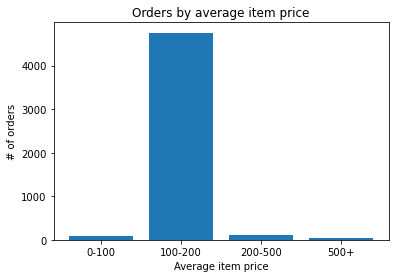

In [16]:
# We can see here when we order the graph in specific groups of avg_item_price we get an
#   answer closer to what we wanted.
plt.title("Orders by average item price")
plt.xlabel("Average item price")
plt.ylabel("# of orders")
plt.bar(samples, ordersLength)
plt.show()

In [18]:
# We can also get the mean for the 100-200 price range, which gives us 
#   a pretty good value.
orders1to2['order_amount'].mean()

302.23921733641913